输入图片大小 H×W,卷积核大小 F×F,步长 S,padding的像素数 P
于是我们可以得出计算公式为：
$$
H_{out}=\frac{\lfloor H-F+2P \rfloor}{S}+1
$$
$$
W_{out}=\frac{\lfloor W-F+2P \rfloor}{S}+1
$$
输出图片的大小则为$$H_{out}×W_{out}$$


In [11]:
import torch.nn as nn
import torch
in_channels= 3#输入通道
out_channels= 64 #输出通道
class N(nn.Module):
    def __init__(self,in_channels,out_channels):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=7, stride=(5,3), padding=(1,2), bias=False)
    def forward(self,x):
        return self.conv(x)
a = torch.randn((8,3,224,200))
model = N(3,64)
print(model(a).shape)

torch.Size([8, 64, 44, 66])


In [2]:
from MyTorchUtils import set_same_seed,seed_worker
set_same_seed(520)
seed_worker(1)

520


In [ ]:
def F():
    global best
    

1new_lr 0.000010
2new_lr 0.000010
3new_lr 0.000010
4new_lr 0.000010
5new_lr 0.000010
6new_lr 0.000010
7new_lr 0.000010
8new_lr 0.000010
9new_lr 0.000010
10new_lr 0.000010
11new_lr 0.000010
12new_lr 0.000009
13new_lr 0.000009
14new_lr 0.000009
15new_lr 0.000009
16new_lr 0.000009
17new_lr 0.000009
18new_lr 0.000009
19new_lr 0.000009
20new_lr 0.000009
21new_lr 0.000009
22new_lr 0.000009
23new_lr 0.000009
24new_lr 0.000008
25new_lr 0.000008
26new_lr 0.000008
27new_lr 0.000008
28new_lr 0.000008
29new_lr 0.000008
30new_lr 0.000008
31new_lr 0.000007
32new_lr 0.000007
33new_lr 0.000007
34new_lr 0.000007
35new_lr 0.000007
36new_lr 0.000006
37new_lr 0.000006
38new_lr 0.000006
39new_lr 0.000006
40new_lr 0.000005
41new_lr 0.000005
42new_lr 0.000005
43new_lr 0.000004
44new_lr 0.000004
45new_lr 0.000004
46new_lr 0.000003
47new_lr 0.000003
48new_lr 0.000002
49new_lr 0.000002
50new_lr 0.000002
[1e-05, 9.965789175663173e-06, 9.92962771715667e-06, 9.891404403142283e-06, 9.851001670659035e-06, 9.80829525

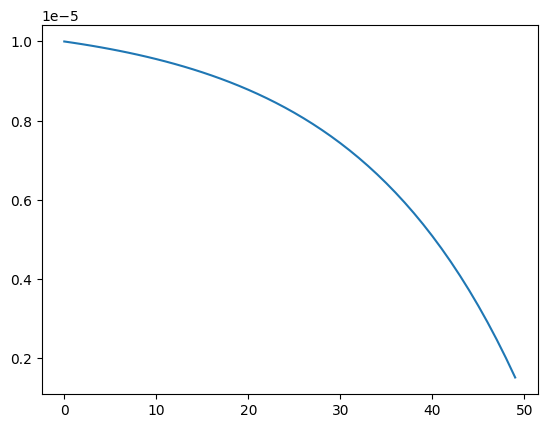

In [25]:
from MyTorchUtils import Adjust_learning_rate_exponent
from ResNet import ResNet18
import matplotlib.pyplot as plt 
from torch import optim
model = ResNet18()
optimizer = optim.Adam(model.parameters(),lr=1e-5)
toadjust = [True,1e-6,1e-5,16,'down']
epochs = 50
lr = []
for epoch in range(1,1+epochs):
    new_lr = Adjust_learning_rate_exponent(optimizer,epoch,toadjust[2],
                                         toadjust[1],toadjust[3],epochs,0,1,mode=toadjust[4])
    lr.append(new_lr)
    print(f'{epoch}new_lr {new_lr:.6f}')
print(lr)
plt.plot(lr)

[1.9985471738815308, 1.7149793027877807, 1.6477610971450805, 1.6258120608011881, 1.6157102069854736, 1.6089054692586262, 1.6045139159520467, 1.59862664159139, 1.530251380221049, 1.522103558921814, 1.5194026421229045, 1.5170860339482626, 1.5152671300252278, 1.5135753814697266, 1.5132134336471557, 1.5114247674306234, 1.5135263109842936, 1.5104204123814902, 1.51161592241923, 1.5107911692301432, 1.510120271619161, 1.5099152654647827, 1.507418680000305, 1.5065809328079223, 1.5060366298675536, 1.5057932842254638, 1.5040217957178752, 1.5036497947057088, 1.5037879681269328, 1.5036075515111287, 1.5030197177886964, 1.5024237944285075, 1.5045428806304932, 1.5008614132563274, 1.4992362609227499, 1.4976176877975464, 1.4968448998769124, 1.4949193378448487, 1.494958597310384, 1.4932765073776244, 1.493614816157023, 1.4920655897776285, 1.4941827034632365, 1.4917040987014771, 1.4908282154719035, 1.4898210501352946, 1.4894830584843954, 1.48707086353302, 1.4859031848271689, 1.4855435750961303]


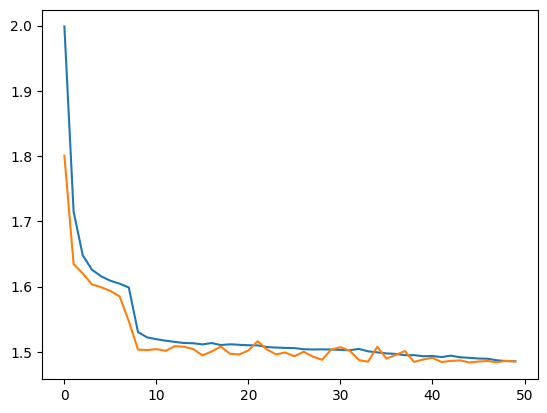

In [10]:
# from collections import defaultdict
import json
import matplotlib.pyplot as plt 
from torch import optim
class DataUpdate(object):
    def __init__(self):
        self.reset()
    def reset(self):
        self.metric = {}
    def update(self,**kwargs):
        for key,value in kwargs.items():
            if key not in self.metric.keys():self.metric[str(key)] = []
            if isinstance(value,list):self.metric[str(key)].extend(value)
            else:self.metric[str(key)].append(value)
with open('E:\Code\pyCode\HandWriten\outdata\Run2024-07-31_18-46-06\\result.json','r',encoding='utf-8') as f:
        datadict = json.load(f)
metric = DataUpdate()
for i in range(0,len(datadict['trainloss']),5):
     metric.update(
          trainloss= datadict['trainloss'][i:i+5],
          valloss= datadict['valloss'][i:i+5],
     )
print(metric.metric['trainloss'])
plt.plot(metric.metric['trainloss'])
plt.plot(metric.metric['valloss'])
plt.show()